In [1]:
# Importing libraries
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [2]:
#Create a path to where your data is stored.
path = r'/Users/marika/Datasets'

In [3]:
#Import data
df_weather = pd.read_csv('/Users/marika/Data Sets/Dataset-weather-prediction-dataset-processed.csv')

In [4]:
df_weather

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [5]:
from sklearn.multioutput import MultiOutputClassifier

In [6]:
#Import data
pleasant_weather = pd.read_csv('/Users/marika/Data Sets/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

In [7]:
pleasant_weather

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
import matplotlib.pyplot as plt

# Drop the date and month columns from df_weather
df_weather = df_weather.drop(columns=['DATE', 'MONTH'])

# Drop the date column from pleasant_weather
pleasant_weather = pleasant_weather.drop(columns=['DATE'])

# Define X and y
X = df_weather.values
y = pleasant_weather.values

# Split the data into training and test sets (without scaling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the range for k values (4 to 5)
k_range = np.arange(4, 6)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))

# Running KNN with MultiOutputClassifier
for i, k in enumerate(k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Use MultiOutputClassifier to accommodate multilabel classification
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    
    # Fit the model on the training data
    classifier.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = classifier.predict(X_test)
    
    # Calculate training and test accuracy
    train_acc[i] = classifier.score(X_train, y_train)
    test_acc[i] = classifier.score(X_test, y_test)

# Print or plot the results
print("Training accuracies:", train_acc)
print("Test accuracies:", test_acc)

Training accuracies: [0.52107843 0.52843137]
Test accuracies: [0.46862745 0.47494553]


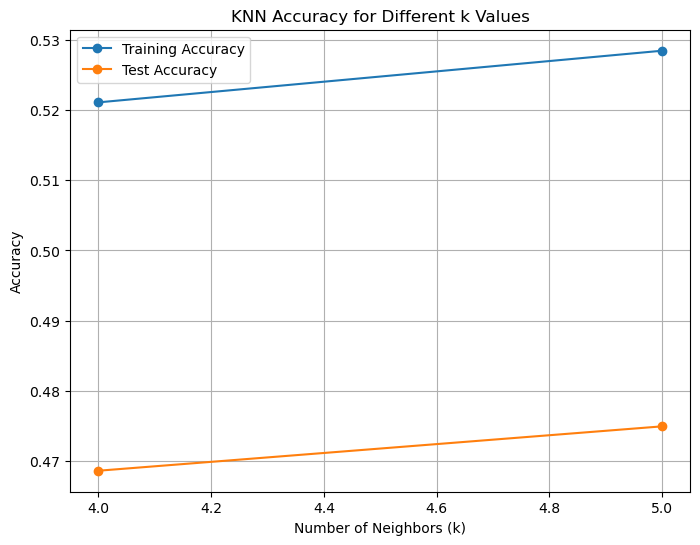

In [9]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(k_range, train_acc, label='Training Accuracy', marker='o')
plt.plot(k_range, test_acc, label='Test Accuracy', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
import matplotlib.pyplot as plt

# Define X and y
X = df_weather.values
y = pleasant_weather.values

# Optional: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardizing the feature data

# Corrected line to split both X and y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the range for k values (4 to 5)
k_range = np.arange(4, 6)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))

# Running KNN with MultiOutputClassifier
for i, k in enumerate(k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Use MultiOutputClassifier to accommodate multilabel classification
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    
    # Fit the model on the training data
    classifier.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = classifier.predict(X_test)
    
    # Calculate training and test accuracy
    train_acc[i] = classifier.score(X_train, y_train)
    test_acc[i] = classifier.score(X_test, y_test)

# Print or plot the results
print("Training accuracies:", train_acc)
print("Test accuracies:", test_acc)

Training accuracies: [0.52238562 0.52647059]
Test accuracies: [0.45664488 0.46557734]


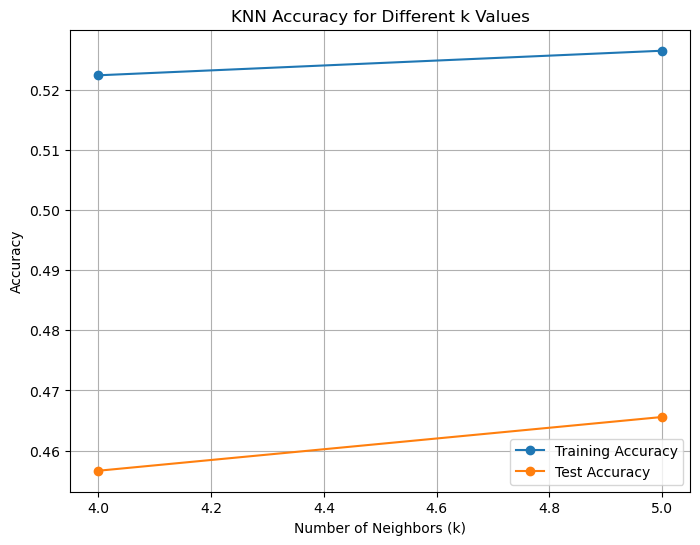

In [11]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(k_range, train_acc, label='Training Accuracy', marker='o')
plt.plot(k_range, test_acc, label='Test Accuracy', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.legend()
plt.grid(True)
plt.show()

# Comparison between unscaled and scaled plot

# Unscaled plot
In the unscaled plot, the model achieved a training accuracy of around 52-53% and a test accuracy of around 47%. This indicates that the model was able to capture some patterns in the unscaled data that were relevant for predicting picnic suitability.

# Scaled plot
The drastic drop in accuracy after scaling suggests that scaling might not be appropriate for this dataset, possibly because it diminishes the importance of features that have naturally larger scales and are more predictive.

# Next steps

# Reevaluate Scaling: 
Given the significant drop in accuracy, it might be worth reconsidering whether scaling is necessary or appropriate for this dataset. You could experiment with different types of scaling (e.g., min-max scaling) or choose not to scale the data at all.

# Feature Importance Analysis:  
Conduct an analysis to identify which features are most important in predicting picnic suitability. If certain features are more critical and have larger scales, preserving their scale might be beneficial.

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
df_weather = pd.read_csv('/Users/marika/Data Sets/Dataset-weather-prediction-dataset-processed.csv')
pleasant_weather = pd.read_csv('/Users/marika/Data Sets/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

# Drop the date and month columns from df_weather
df_weather = df_weather.drop(columns=['DATE', 'MONTH'])

# Drop the date column from pleasant_weather
pleasant_weather = pleasant_weather.drop(columns=['DATE'])

# Define X and y
X = df_weather.values
y = pleasant_weather.values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Start with initial parameters
initial_k_range = np.arange(1, 5)
final_k = 5  

train_acc = []
test_acc = []

# Running KNN with different k values
for k in initial_k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    
    # Fit the model on the training data
    classifier.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = classifier.predict(X_test)
    
    # Calculate and store accuracy
    train_acc.append(classifier.score(X_train, y_train))
    test_acc.append(classifier.score(X_test, y_test))

    print(f"k={k}: Training Accuracy: {train_acc[-1]}, Test Accuracy: {test_acc[-1]}")

# Final model using final_k
knn_final = KNeighborsClassifier(n_neighbors=final_k)
classifier_final = MultiOutputClassifier(knn_final, n_jobs=-1)
classifier_final.fit(X_train, y_train)
y_pred_final = classifier_final.predict(X_test)
train_acc_final = classifier_final.score(X_train, y_train)
test_acc_final = classifier_final.score(X_test, y_test)

print(f"Final Model: k={final_k}, Training Accuracy: {train_acc_final}, Test Accuracy: {test_acc_final}")

# Record the accuracies
starting_params = f"Initial k values: {initial_k_range}"
final_params = f"Final k value: {final_k}, Training Accuracy: {train_acc_final}, Test Accuracy: {test_acc_final}"
print(starting_params)
print(final_params)

k=1: Training Accuracy: 1.0, Test Accuracy: 0.440958605664488
k=2: Training Accuracy: 0.5630174291938997, Test Accuracy: 0.45555555555555555
k=3: Training Accuracy: 0.5701525054466231, Test Accuracy: 0.4644880174291939
k=4: Training Accuracy: 0.5210784313725491, Test Accuracy: 0.46862745098039216
Final Model: k=5, Training Accuracy: 0.5284313725490196, Test Accuracy: 0.4749455337690632
Initial k values: [1 2 3 4]
Final k value: 5, Training Accuracy: 0.5284313725490196, Test Accuracy: 0.4749455337690632


This model has a training accuracy of 1.0 (100%) and a test accuracy of 0.44 (approximately 44%). I will try the next model with a higher k value, in hopes of the test accuracy being maximized. 

By experimenting with larger k values, I should be able to identify an optimal k that balances good generalization with strong performance on the test data.

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
df_weather = pd.read_csv('/Users/marika/Data Sets/Dataset-weather-prediction-dataset-processed.csv')
pleasant_weather = pd.read_csv('/Users/marika/Data Sets/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

# Drop the date and month columns from df_weather
df_weather = df_weather.drop(columns=['DATE', 'MONTH'])

# Drop the date column from pleasant_weather
pleasant_weather = pleasant_weather.drop(columns=['DATE'])

# Define X and y
X = df_weather.values
y = pleasant_weather.values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Start with initial parameters
initial_k_range = np.arange(5, 6)
final_k = 6  

train_acc = []
test_acc = []

# Running KNN with different k values
for k in initial_k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    
    # Fit the model on the training data
    classifier.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = classifier.predict(X_test)
    
    # Calculate and store accuracy
    train_acc.append(classifier.score(X_train, y_train))
    test_acc.append(classifier.score(X_test, y_test))

    print(f"k={k}: Training Accuracy: {train_acc[-1]}, Test Accuracy: {test_acc[-1]}")

# Final model using final_k
knn_final = KNeighborsClassifier(n_neighbors=final_k)
classifier_final = MultiOutputClassifier(knn_final, n_jobs=-1
classifier_final.fit(X_train, y_train)
y_pred_final = classifier_final.predict(X_test)
train_acc_final = classifier_final.score(X_train, y_train)
test_acc_final = classifier_final.score(X_test, y_test)

print(f"Final Model: k={final_k}, Training Accuracy: {train_acc_final}, Test Accuracy: {test_acc_final}")

# Record the accuracies
starting_params = f"Initial k values: {initial_k_range}"
final_params = f"Final k value: {final_k}, Training Accuracy: {train_acc_final}, Test Accuracy: {test_acc_final}"
print(starting_params)
print(final_params)

k=5: Training Accuracy: 0.5284313725490196, Test Accuracy: 0.4749455337690632
Final Model: k=6, Training Accuracy: 0.5082788671023966, Test Accuracy: 0.47320261437908495
Initial k values: [5]
Final k value: 6, Training Accuracy: 0.5082788671023966, Test Accuracy: 0.47320261437908495


In [17]:
# Test with higher k values
for k in [7, 8, 9, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    train_acc = classifier.score(X_train, y_train)
    test_acc = classifier.score(X_test, y_test)
    
    print(f"k={k}: Training Accuracy: {train_acc}, Test Accuracy: {test_acc}")


k=7: Training Accuracy: 0.5130174291938998, Test Accuracy: 0.4812636165577342
k=8: Training Accuracy: 0.49989106753812634, Test Accuracy: 0.47843137254901963
k=9: Training Accuracy: 0.50239651416122, Test Accuracy: 0.47886710239651414
k=10: Training Accuracy: 0.49504357298474944, Test Accuracy: 0.47690631808278866


In [18]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Start with initial parameters
initial_k_range = np.arange(5, 7)
final_k = 7  

train_acc = []
test_acc = []

# Running KNN with different k values
for k in initial_k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1)
    
    # Fit the model on the training data
    classifier.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = classifier.predict(X_test)
    
    # Calculate and store accuracy
    train_acc.append(classifier.score(X_train, y_train))
    test_acc.append(classifier.score(X_test, y_test))

    print(f"k={k}: Training Accuracy: {train_acc[-1]}, Test Accuracy: {test_acc[-1]}")

# Final model using final_k
knn_final = KNeighborsClassifier(n_neighbors=final_k)
classifier_final = MultiOutputClassifier(knn_final, n_jobs=-1)
classifier_final.fit(X_train, y_train)
y_pred_final = classifier_final.predict(X_test)
train_acc_final = classifier_final.score(X_train, y_train)
test_acc_final = classifier_final.score(X_test, y_test)

print(f"Final Model: k={final_k}, Training Accuracy: {train_acc_final}, Test Accuracy: {test_acc_final}")

# Record the accuracies
starting_params = f"Initial k values: {initial_k_range}"
final_params = f"Final k value: {final_k}, Training Accuracy: {train_acc_final}, Test Accuracy: {test_acc_final}"
print(starting_params)
print(final_params)

k=5: Training Accuracy: 0.5284313725490196, Test Accuracy: 0.4749455337690632
k=6: Training Accuracy: 0.5082788671023966, Test Accuracy: 0.47320261437908495
Final Model: k=7, Training Accuracy: 0.5130174291938998, Test Accuracy: 0.4812636165577342
Initial k values: [5 6]
Final k value: 7, Training Accuracy: 0.5130174291938998, Test Accuracy: 0.4812636165577342


I chose a k value of 7 because it seemed to have reached the optimal point. However, since I've increased the k value, the training accuracy slightly decreases due to the model becoming more generalized and less likely to fit the training data perfectly. 

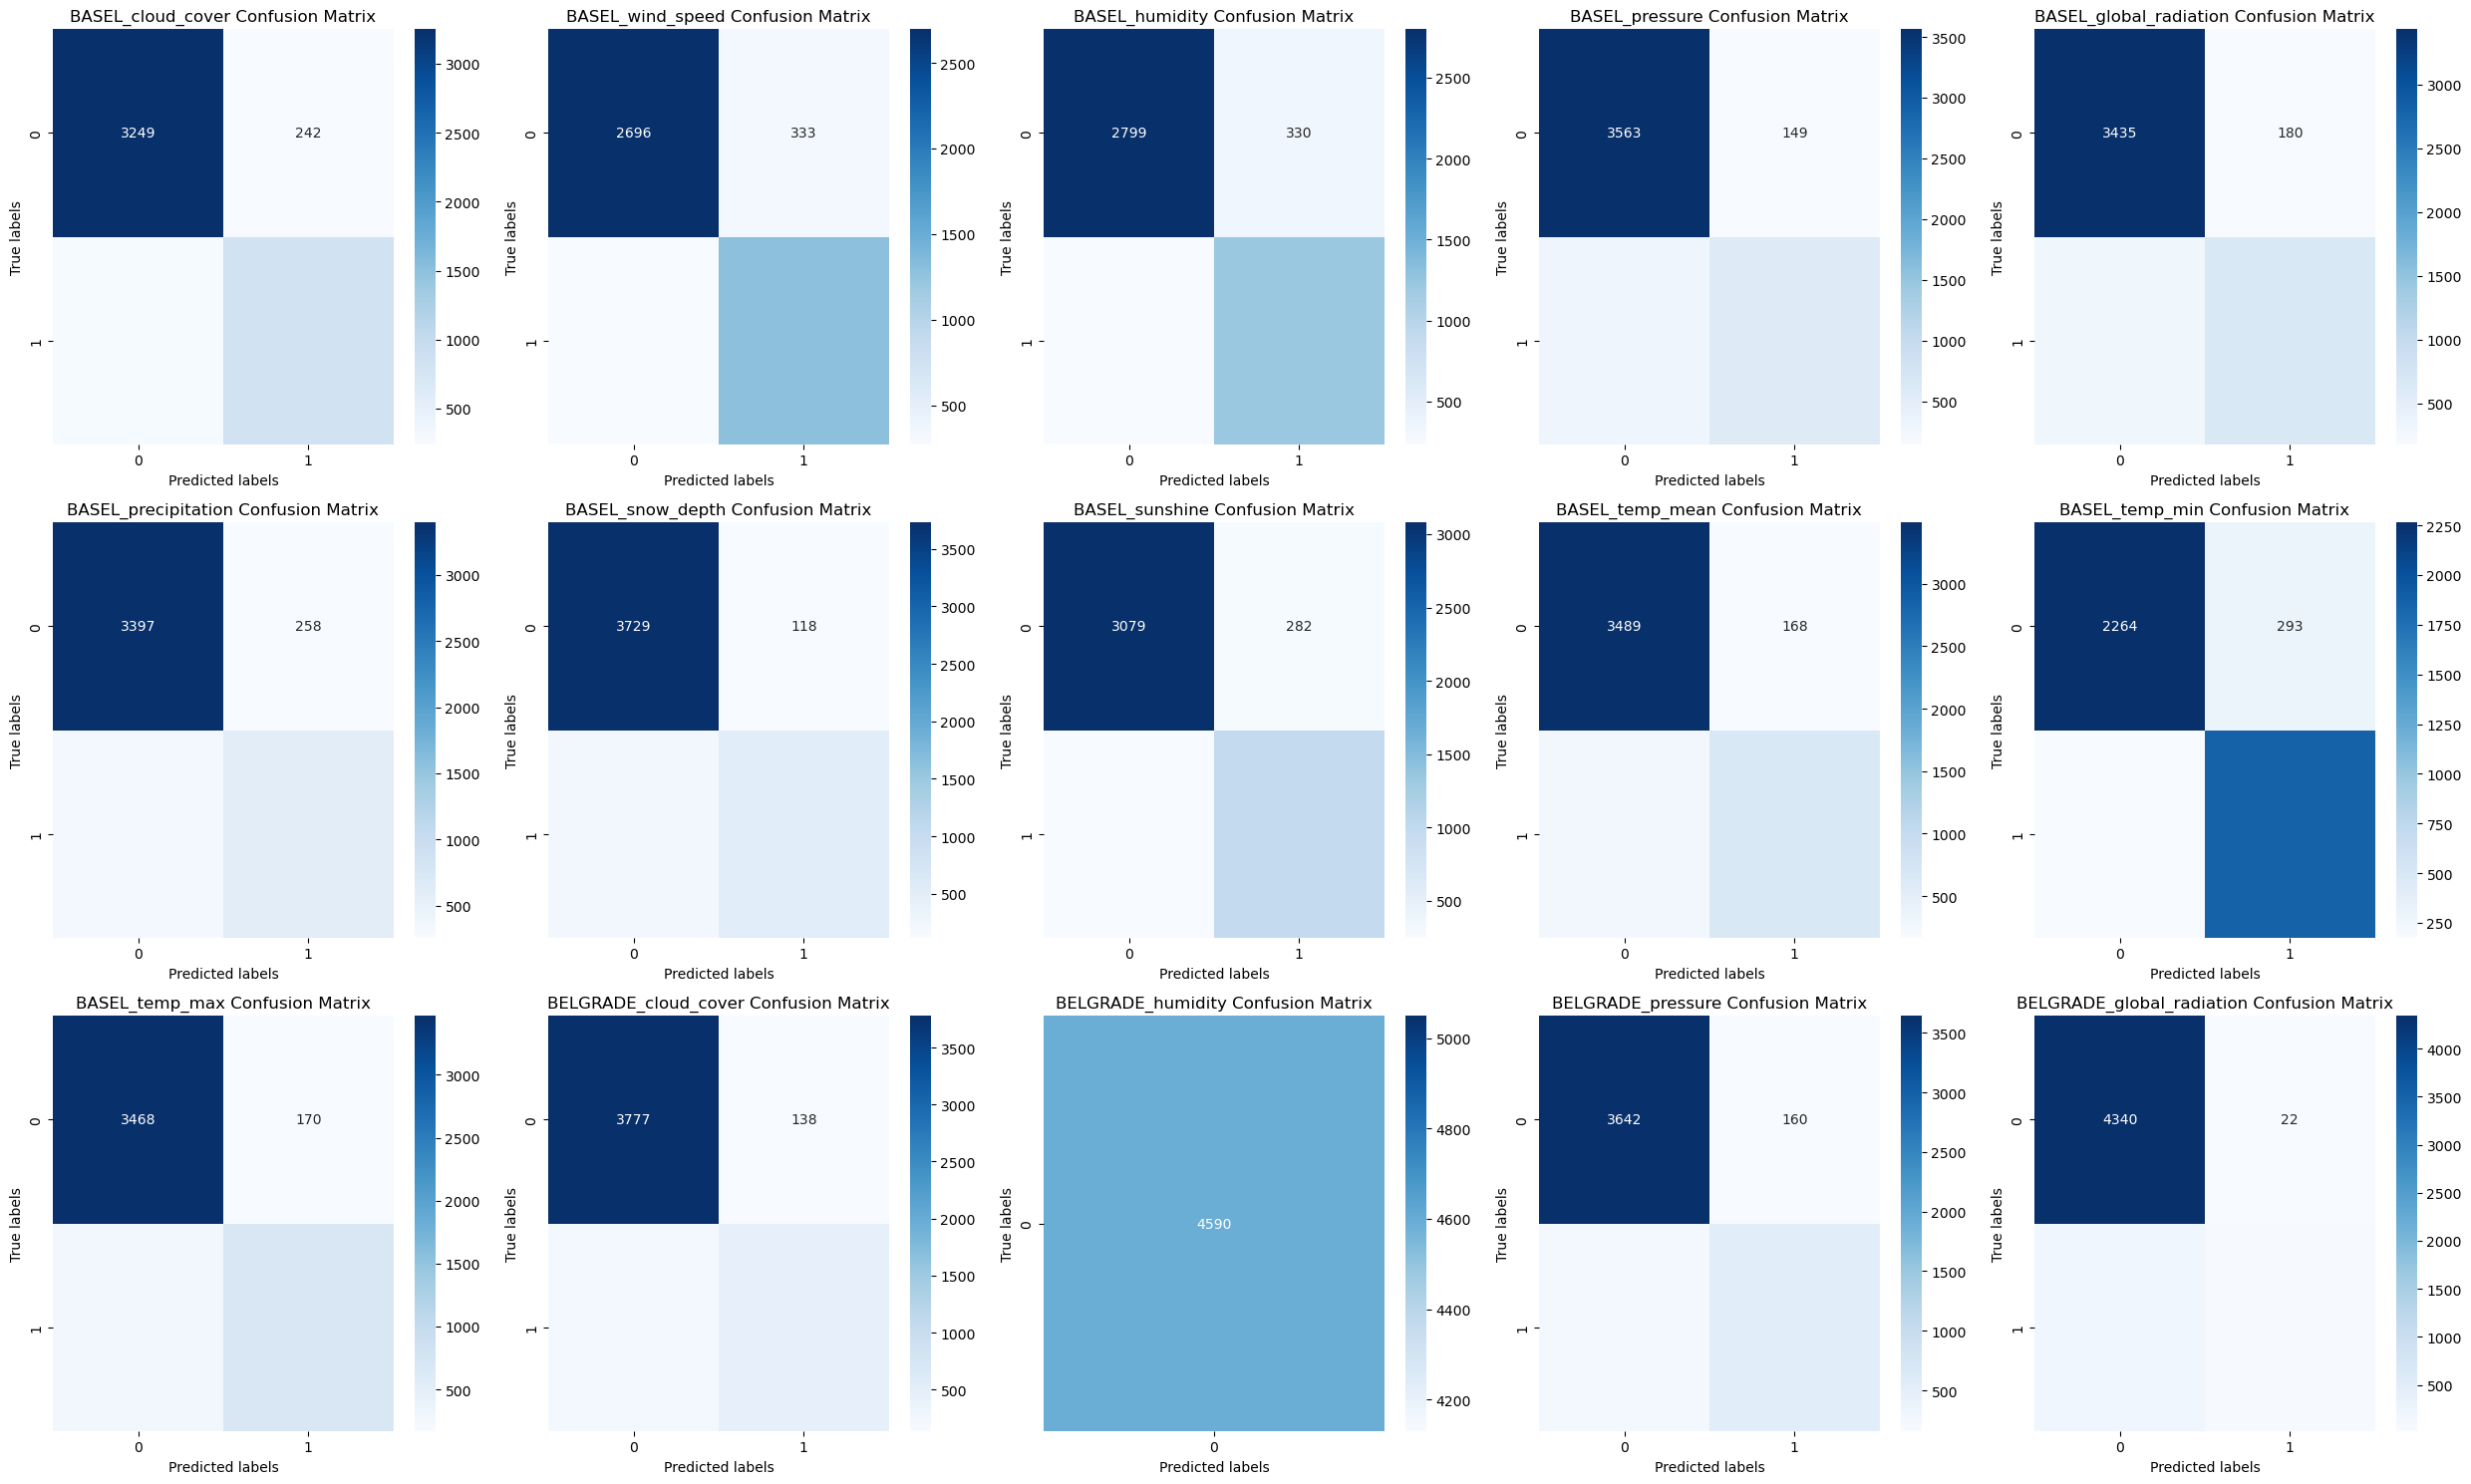

In [21]:
# Extract location names from df_weather columns
locations = list(df_weather.columns)  
key = "_pleasant_weather" 
count = 0

# Plot confusion matrices for each location
figure, ax = plt.subplots(3, 5, figsize=(25, 15)) 

for i in range(3):
    for j in range(5):
        if count >= len(locations):
            break
        
        # Generate confusion matrix for each location
        name = locations[count]
        cm = confusion_matrix(y_test[:, count], y_pred_final[:, count])
        
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap="Blues")
        
        # Labels, title, and ticks
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Confusion Matrix')
        
        count += 1

plt.tight_layout()
plt.show()